# **Application du clustering**

Le clustering est une méthode d'apprentissage non supervisé qui consiste à regrouper des objets similaires en fonction de leurs caractéristiques, sans connaître à l'avance les catégories auxquelles ils appartiennent. Des algorithmes courants de clustering incluent k-means, DBSCAN et les algorithmes hiérarchiques. Le clustering est souvent utilisé dans des domaines tels que la segmentation de marché ou l'analyse d'images.

## **0. Imports**

In [10]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, DBSCAN
from sklearn.datasets import make_blobs
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler

## **1. charger les données**

In [11]:
data, labels = make_blobs(n_samples=300, centers=4, cluster_std=1.0, random_state=42) # creer un dataset adapté au clustering
scaler = StandardScaler() # standardiser les données
data_scaled = scaler.fit_transform(data)
pd.DataFrame(data).head()

,0,1
0,-9.297689,6.473679
1,-9.698741,6.938967
2,-1.686653,7.793442
3,-7.097308,-5.781333
4,-10.876452,6.315437


In [12]:
def visualisation(titre,x,y,label):
    plt.scatter(x,y,c=label, alpha=0.7)
    plt.title(titre)
    plt.xlabel("Caracteristique 1")
    plt.ylabel("Caracteristique 2")
    plt.show()

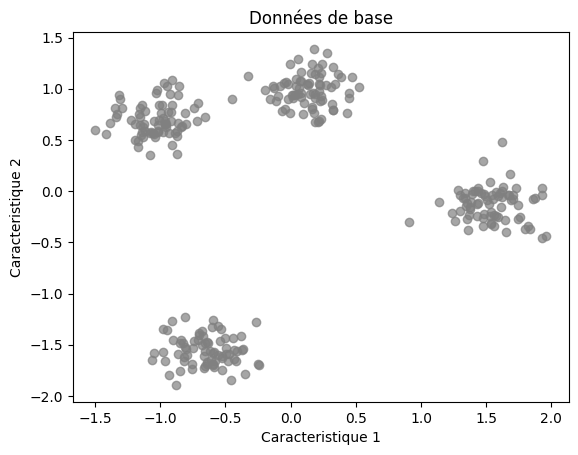

In [13]:
visualisation("Données de base",data_scaled[:, 0], data_scaled[:, 1], 'gray')

## **2. Kmeans**

In [14]:
kmeans = KMeans(n_clusters=4, random_state=42)# nombre de cluster"k" egale 4 
kmeans_labels = kmeans.fit_predict(data_scaled)

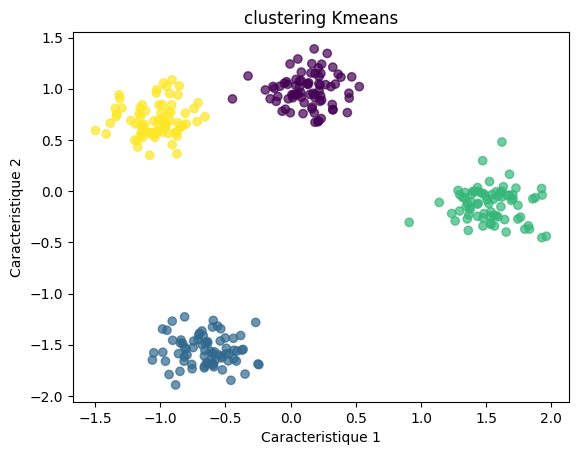

In [15]:
visualisation("clustering Kmeans",data_scaled[:, 0], data_scaled[:, 1], kmeans_labels)#kmeans_labels contiennent les etiquettes du cluster pour chaque donnée

In [16]:
print("Centres de Cluster K-Means:")
print(kmeans.cluster_centers_)

Centres de Cluster K-Means:
[[ 0.13143596  0.98564007]
 [-0.64929923 -1.55675468]
 [ 1.53816887 -0.12928168]
 [-1.03586967  0.69654164]]


## **3. DBSCAN**

In [17]:
# 'eps' définit la distance maximale entre deux points pour qu'ils soient considérés comme voisins
# 'min_samples' définit le nombre minimum de points pour qu'un voisinage soit considéré comme un cluster
dbscan = DBSCAN(eps=0.2, min_samples=5)
dbscan_labels = dbscan.fit_predict(data_scaled)#appliquer l'algorithme et predire

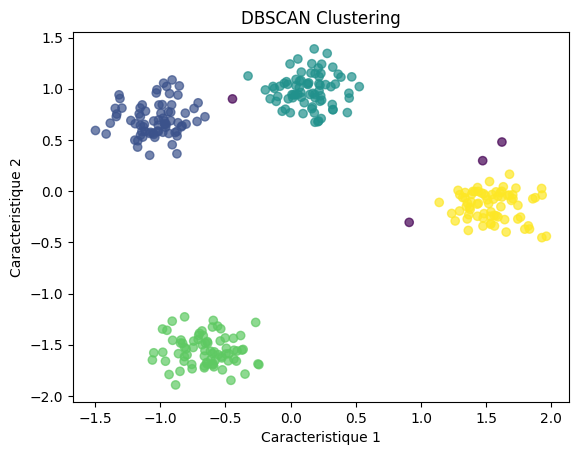

In [18]:
visualisation("DBSCAN Clustering",data_scaled[:, 0], data_scaled[:, 1], dbscan_labels)

In [19]:
print("Nombre de valeurs abberantes est: ",np.sum(dbscan_labels==-1))#les valeurs abberantes sont etiquetées par -1

Nombre de valeurs abberantes est:  4
